# Phase 2 Project

# Business Problem
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

# Import necessary libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import pandas as pd
import sqlite3

# Loading and Exploring Data

In [59]:
# load data from movie_basics
conn = sqlite3.connect('im.db')
dm = pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn)
dm

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [60]:
# load data from movie_ratings
conn = sqlite3.connect('im.db')
dt = pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)
dt

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [61]:
# Merge the two datasets on movie_id
df_merged = pd.merge(dm, dt, on="movie_id", how="inner")
# Close the database connection
conn.close()

In [46]:
df_merged

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [62]:
df = pd.read_csv("tn.movie_budgets.csv.gz")
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [50]:
# Convert titles to lowercase and strip spaces for better matching
df["movie"] = df["movie"].str.lower().str.strip()
df_merged["primary_title"] = df_merged["primary_title"].str.lower().str.strip()
df_merged["original_title"] = df_merged["original_title"].str.lower().str.strip()


In [63]:
df_final = pd.merge(df_merged, df, left_on="primary_title", right_on="movie", how="inner")
df_final

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2016,NaN,Drama,9.1,28,65,"Dec 29, 1995",Richard III,"$9,200,000","$2,684,904","$4,199,334"
2871,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7.3,7,12,"Oct 24, 2008",Heroes,"$400,000","$655,538","$655,538"
2872,tt8976772,Push,Push,2019,92.0,Documentary,7.3,33,70,"Feb 6, 2009",Push,"$38,000,000","$31,811,527","$49,678,401"
2873,tt9024106,Unplanned,Unplanned,2019,106.0,"Biography,Drama",6.3,5945,33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621"


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Checking for missing values

In [27]:
df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

# Data Cleaning and Reprocessing
## Convert Budget and Revenue Columns to Numeric

The budget and revenue data are stored as strings. They should be converted to numeric.

In [28]:
# Budget and revenue columns to numeric
cols_to_convert = ["production_budget", "domestic_gross", "worldwide_gross"]
for col in cols_to_convert:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


Convert Release Date to DateTime format

In [29]:
# Date converted to DateTime format
df["release_date"] = pd.to_datetime(df["release_date"])
df["year"] = df["release_date"].dt.year


In [30]:
df.describe()

,id,production_budget,domestic_gross,worldwide_gross,year
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,12.724386
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000


# Exploratory Data Analysis

What is the Relationship between Budget and Revenue

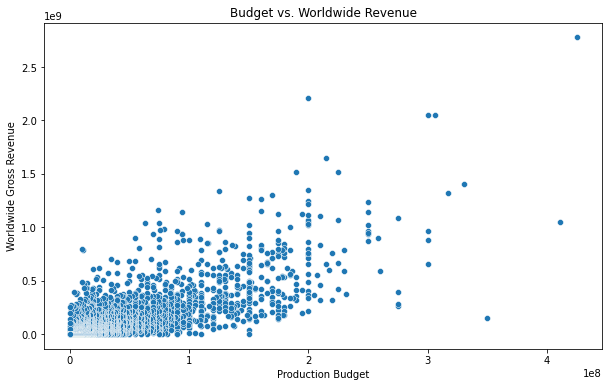

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["production_budget"], y=df["worldwide_gross"])
plt.xlabel("Production Budget")
plt.ylabel("Worldwide Gross Revenue")
plt.title("Budget vs. Worldwide Revenue")
plt.show()

Distribution of Profitable vs. Non-profitable Movies

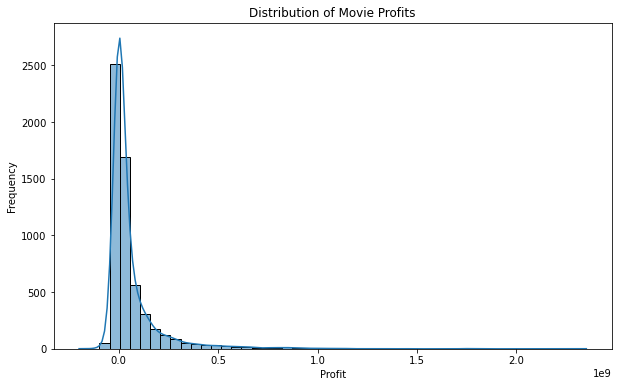

In [32]:
df["profit"] = df["worldwide_gross"] - df["production_budget"]

plt.figure(figsize=(10, 6))
sns.histplot(df["profit"], bins=50, kde=True)
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Profits")
plt.show()


Top 10 Most Profitable Movies

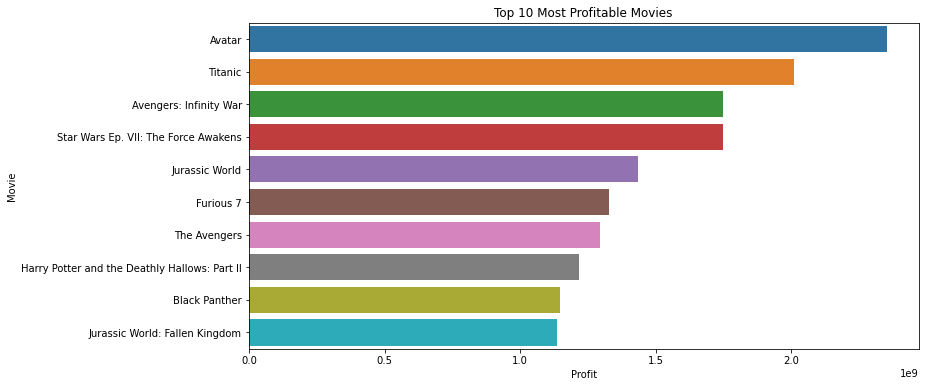

In [33]:
df_top_profitable = df.sort_values(by="profit", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top_profitable["profit"], y=df_top_profitable["movie"])
plt.xlabel("Profit")
plt.ylabel("Movie")
plt.title("Top 10 Most Profitable Movies")
plt.show()

# Statistical Analysis

## T-test: Research Question
Does a movie's production budget significantly impact its worldwide gross earnings?
## Hypothesis
𝐻0: There is no significant difference in worldwide gross earnings between high-budget and low-budget movies.  
𝐻𝐴: There is a significant difference in worldwide gross earnings between high-budget and low-budget movies.  

**Mathematically:**     
H0 : μhigh budget = μlow budget  
𝐻𝐴 : 𝜇high budget ≠ 𝜇low budget

## Assumption Testing
Checking if the assumptions hold before running the t-test  
i) **Normality Assumption**  
A t-test assumes the data is approximately normally distributed. We can check this using a histogram and the Shapiro-Wilk test:

In [34]:
from scipy.stats import shapiro
# Define high and low-budget categories based on median production budget.
median_budget = df["production_budget"].median()
high_budget = df[df["production_budget"] >= median_budget]["worldwide_gross"]
low_budget = df[df["production_budget"] < median_budget]["worldwide_gross"]
# Check normality
shapiro_high = shapiro(high_budget.sample(500, random_state=42))  # Sample to avoid errors in large datasets
shapiro_low = shapiro(low_budget.sample(500, random_state=42))

print(f"Shapiro-Wilk Test for High-Budget Movies: W={shapiro_high.statistic}, p={shapiro_high.pvalue}")
print(f"Shapiro-Wilk Test for Low-Budget Movies: W={shapiro_low.statistic}, p={shapiro_low.pvalue}")


Shapiro-Wilk Test for High-Budget Movies: W=0.7218949794769287, p=5.169112674265246e-28
Shapiro-Wilk Test for Low-Budget Movies: W=0.5140835046768188, p=8.263605900135676e-35


**High-Budget Movies:**  
Since the p-value is far below the standard significance level (𝛼 = 0.05), we reject the null hypothesis. This means that the worldwide gross earnings of high-budget movies do not follow a normal distribution.  
**Low-Budget Movies:**  
The p-value is much smaller than 0.05, so we reject the null hypothesis. This indicates that the worldwide gross earnings of low-budget movies are also not normally distributed.


**ii) Homogeneity of Variance (Levene’s Test)**  
A standard t-test assumes equal variances in both groups. Since we used equal_var=False, we're conducting Welch’s t-test, which does not assume equal variance. However, we can still check using Levene’s test:

In [35]:
from scipy.stats import levene

levene_test = levene(high_budget, low_budget)
print(f"Levene's Test: W={levene_test.statistic}, p={levene_test.pvalue}")


Levene's Test: W=719.1307172390815, p=2.0801579114401852e-149


Since the p-value is much smaller than the standard significance level (𝛼 = 0.05), we reject the null hypothesis. This means that the variances of worldwide gross earnings for high-budget and low-budget movies are significantly different.

**Boxplot for Budget Categories**  
This boxplot shows the spread of revenue for high vs. low-budget movies.

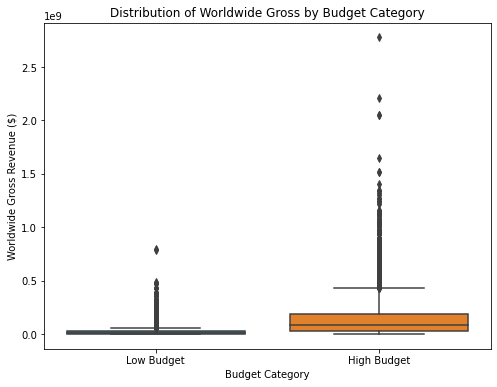

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

df["budget_category"] = df["production_budget"] >= median_budget
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["budget_category"], y=df["worldwide_gross"])
plt.xticks([0, 1], ["Low Budget", "High Budget"])
plt.ylabel("Worldwide Gross Revenue ($)")
plt.xlabel("Budget Category")
plt.title("Distribution of Worldwide Gross by Budget Category")
plt.show()


**Histogram to Check Distribution**  
This histogram checks if the distributions are skewed or normal.

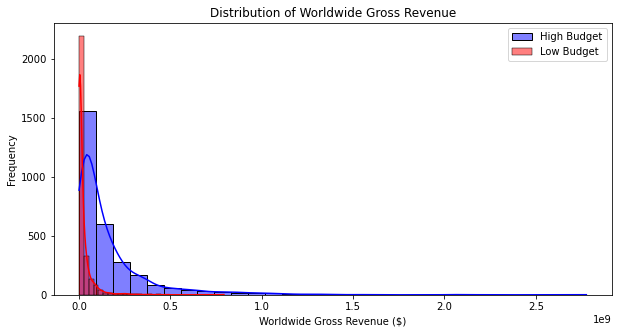

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(high_budget, bins=30, color='blue', kde=True, label="High Budget")
sns.histplot(low_budget, bins=30, color='red', kde=True, label="Low Budget")
plt.legend()
plt.title("Distribution of Worldwide Gross Revenue")
plt.xlabel("Worldwide Gross Revenue ($)")
plt.ylabel("Frequency")
plt.show()


## Conducting the T-test

In [38]:

t_stat, p_value = stats.ttest_ind(high_budget, low_budget, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 32.12504153761319, P-Value: 9.18893427925073e-197


**Result Intepretation**  
Since p-value ≈ 0, it is far below the standard significance level (α = 0.05).
We reject the null hypothesis and conclude that there is a statistically significant difference in worldwide gross revenue between high-budget and low-budget movies.
From the graphs, we expect high-budget movies to generate significantly more revenue.

**Business Recommendation:**  
The data supports that higher production budgets generally lead to higher worldwide earnings.   
While budget matters, other factors (e.g., genre, star power, marketing) should also be analyzed.

## Regression Analysis: Research Question
Does a movie’s production budget significantly impact its worldwide gross earnings?  
## Hypothesis 
𝐻0: A movie’s production budget has no significant impact on its worldwide gross earnings.  
𝐻𝐴: A movie’s production budget has a significant impact on its worldwide gross earnings. 

**Mathematically:**      
H0 : β1 = 0 (Production budget has no effect)   
𝐻𝐴 : β1 ≠ 10 (Production budget has an effect)  
where 𝛽1 is the coefficient for production budget in the regression model.

## Assumption Testing
Before running the regression, we must check the assumptions of linear regression:  
Linearity: The relationship between production budget and worldwide gross should be linear.  
Normality of Residuals: Residuals (errors) should be normally distributed.  
Homoscedasticity: Residuals should have constant variance (no patterns in residual plots).  
Independence: Observations should be independent (no duplicate entries or autocorrelation).  
We check these assumptions using scatter plots, histograms, and residual plots.

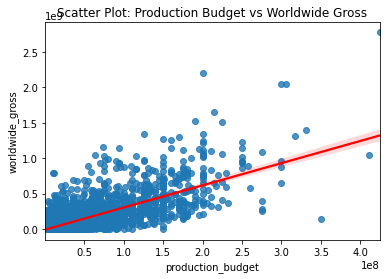

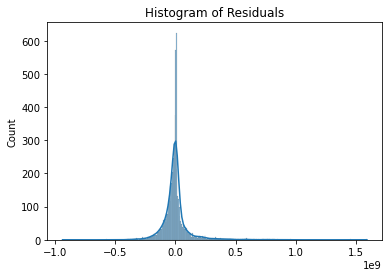

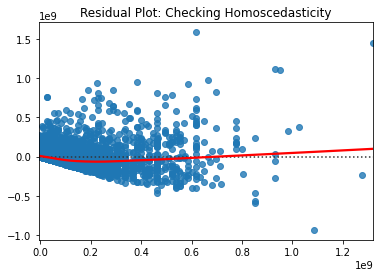

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     7355.
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        09:32:38   Log-Likelihood:            -1.1557e+05
No. Observations:                5782   AIC:                         2.311e+05
Df Residuals:                    5780   BIC:                         2.311e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.286e+06   1.91e+0

In [39]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
X = df["production_budget"]
y = df["worldwide_gross"]

# Add Constant for Regression
X = sm.add_constant(X)

# Fit Linear Regression Model
model = sm.OLS(y, X).fit()

# Check Assumptions
# 1. Scatter Plot for Linearity
sns.regplot(x=df["production_budget"], y=df["worldwide_gross"], line_kws={"color": "red"})
plt.title("Scatter Plot: Production Budget vs Worldwide Gross")
plt.show()

# 2. Histogram for Residual Normality
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# 3. Residuals vs Fitted Values for Homoscedasticity
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title("Residual Plot: Checking Homoscedasticity")
plt.show()

# 4. Summary Statistics for Residuals
print(model.summary())


**Interpretation of the OLS Regression Results**  
R-squared (0.560): This means that 56% of the variance in worldwide_gross (box office revenue) is explained by production_budget. While this indicates a moderate level of explanatory power, 44% of the variation remains unexplained, suggesting other factors influence worldwide gross revenue.  

F-statistic (7355) & Prob (F-statistic) = 0.00: The very high F-statistic and the p-value of 0.00 indicate that the model as a whole is statistically significant. This means that production_budget is a meaningful predictor of worldwide_gross.  

Intercept (const = -7.286e+06, p = 0.000): The intercept suggests that if a movie had a production budget of zero, it would have an expected worldwide gross of approximately -$7.29 million.  

Production Budget (coef = 3.1269, p = 0.000): For every 1 dollar increase in the production budget, worldwide gross revenue is   expected to increase by approximately $3.13. Since the p-value is 0.000, this predictor is highly significant.  

The regression model shows that production budget significantly influences worldwide gross revenue. The positive coefficient suggests that higher-budget movies tend to generate more revenue.

However, only 56% of the variance in revenue is explained by the model, meaning other factors such as genre, star power, marketing, and release strategy are also crucial determinants.


# Conclusion and Recommendations

High-budget movies tend to generate higher revenue (T-test).

Production budget is a strong predictor of revenue (Regression).

The company should prioritize films with larger budgets but ensure cost efficiency.

Identify profitable genres and release timing for better success.
